In [1]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

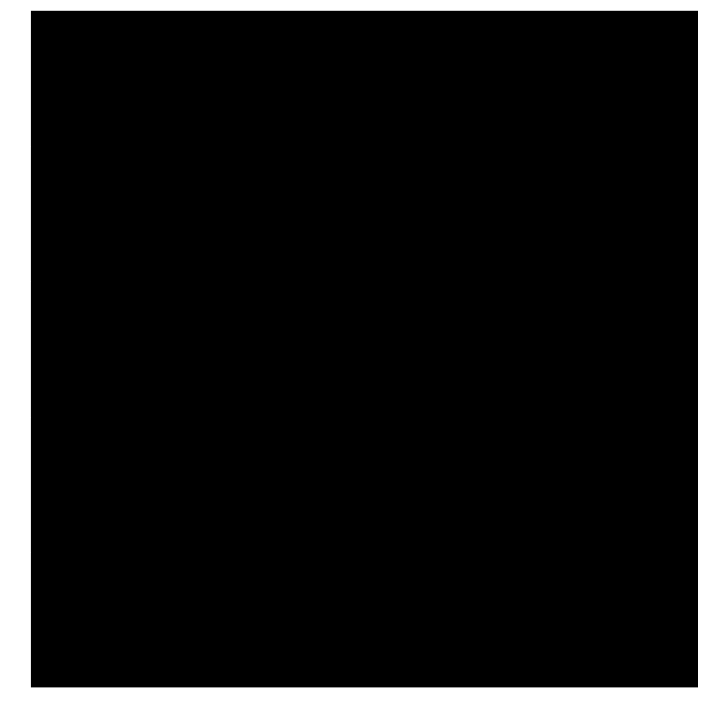

In [2]:
import Utils.readUtils
import numpy as np

# Experimento 1: Autoencoder

- Hidden layer de 100
- Input distinto en cada ciclo de entrenamiento
- 1000*1000 funciona
- Input es el vector sin ningún tratamiento

In [4]:
# Generate set of data for training cycle
def genData(nMaquinas, nOrdenes, cant):
    matrix = []
    for i in range(cant):
        a = Utils.readUtils.solucionAleatoria(nMaquinas, nOrdenes)
        matrix.append(a)
    X = torch.Tensor(matrix)
    return X

a = genData(nMaquinas, nOrdenes, 11).to(device);
print("X: ", tuple(a.size()))

X:  (11, 12)


In [3]:
## Problem parameters

nMaquinas = 3
nOrdenes = 10
matrizProcesamiento = []
matrizAjustes = []

In [10]:
## Setup model

N = nOrdenes + nMaquinas - 1 # input layer
M = 100 # Encoded Layer
H = 100 # Hidden layer

model = torch.nn.Sequential(
    torch.nn.Linear(N, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, M),
    torch.nn.Linear(M, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, N)
)
model.to(device)
b = model(a)
print("Y:", tuple(b.size()))

Y: (11, 12)


In [11]:
## Learning parameters
learning_rate = 1e-3
lambda_l2 = 1e-5

# compute squared differences of each element
# Typically used in regressions
criterion = torch.nn.MSELoss()

#Stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

it = 1000
nInputs = 1000 #number of samples per training


In [12]:
## Training

for i in range(it):
    # Generate input
    X = genData(nMaquinas, nOrdenes, nInputs).to(device)
    #Feed forward
    y_pred = model(X)
    
    #compute loss function
    #Since it is an autoencoder, our output is the input
    loss = criterion(y_pred, X)
    
    #Clear gradient
    optimizer.zero_grad()
    
    #Backprop
    loss.backward()
    
    #Apply changes
    optimizer.step()



In [13]:
a =

b = model(a)

print(a, b)

SyntaxError: invalid syntax (635209548.py, line 1)

### Experimento 1:

#### Autoencoder?? De 12 -> 100 -> 2 -> 100 -> 12
#### Fracaso total xd

Ideas:  
- Usar un input que sea de 0ros y 1nos
- Entrenar  sin la capa intermedia de 100??
- Entrenar siempre con los mismos datos.. ( En este caso ando generando datos nuevos siempre)
        


# Experimento 2:
- Igual que el experimento 1
- mismo input siempre

In [182]:
## Setup model

N = nOrdenes + nMaquinas - 1 # input layer
M = 2 # Encoded Layer
H = 100 # Hidden layer

model = torch.nn.Sequential(
    torch.nn.Linear(N, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, N)
)
model.to(device)
#b = model(a)
# print("Y:", tuple(b.size()))

Sequential(
  (0): Linear(in_features=12, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=12, bias=True)
)

In [183]:
## Learning parameters
learning_rate = 1e-3
lambda_l2 = 1e-5

# compute squared differences of each element
# Typically used in regressions
criterion = torch.nn.MSELoss()

#Stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

it = 1000
nInputs = 100000 #number of samples per training
a = genData(nMaquinas, nOrdenes, nInputs).to(device)

In [184]:
## Training

for i in range(it):
    # Generate input
    X = a
    #Feed forward
    y_pred = model(X)
    
    #compute loss function
    #Since it is an autoencoder, our output is the input
    loss = criterion(y_pred, X)
    
    #Clear gradient
    optimizer.zero_grad()
    
    #Backprop
    loss.backward()
    
    #Apply changes
    optimizer.step()

In [185]:
a = a

b = model(a[3:8])

print(a[3:8], b)

tensor([[ 3.,  9., -1.,  6.,  8.,  7.,  4.,  5.,  1.,  0., -1.,  2.],
        [ 3.,  2.,  4.,  6.,  8.,  1.,  0.,  5.,  9.,  7., -1., -1.],
        [ 9., -1.,  6.,  7.,  5.,  0.,  8.,  2.,  4.,  1.,  3., -1.],
        [ 2.,  7., -1.,  8.,  0.,  6.,  1.,  3.,  5.,  9., -1.,  4.],
        [ 2.,  8.,  7.,  6.,  3.,  9.,  5.,  1.,  4., -1., -1.,  0.]],
       device='cuda:0') tensor([[ 3.6903,  8.0572, -0.5415,  5.9323,  7.4280,  6.2936,  4.3900,  5.2022,
          1.1026,  0.0383,  0.7620,  1.4483],
        [ 3.3845,  2.3230,  4.0359,  6.2135,  7.7760,  0.6507, -0.1871,  5.3455,
          9.0024,  6.0921, -0.9503, -0.3146],
        [ 8.7503,  0.1826,  5.4761,  5.9357,  5.2146,  1.0011,  7.0730,  2.1545,
          3.5383,  1.4534,  2.6043,  0.3694],
        [ 2.1817,  5.6620,  0.1400,  7.9497,  0.0579,  5.9422,  1.4233,  2.8887,
          5.4412,  8.5439,  0.0837,  3.4461],
        [ 2.1798,  8.1868,  7.1006,  5.4636,  2.6230,  8.8624,  5.3294,  1.1237,
          4.2602, -1.0054, -0.8053, 

### Notas del experimento 2, un fracaso jaja. Pero al parecer funciona cuando solo intentamos input de tamaño 2 ( osea siempre los dos vectores lol) 

# Experimento 3:
## Igual al experimento2 y al experimento 1, pero usare un input de puros 0 y 1


In [149]:
# Generate set of data for training cycle
def genData(nMaquinas, nOrdenes, cant):
    
    X = torch.rand(cant, nMaquinas + nOrdenes -1)*5
    X = X.tolist()
    X = torch.IntTensor(X)
    X = X.tolist()
    X = torch.FloatTensor(X)
    return X

a = genData(nMaquinas, nOrdenes, 11).to(device);
print(a)
print("X: ", tuple(a.size()))

tensor([[1., 0., 4., 2., 1., 1., 3., 0., 3., 4., 4., 4.],
        [0., 1., 3., 1., 0., 0., 4., 4., 1., 3., 2., 3.],
        [4., 3., 4., 1., 2., 4., 0., 4., 4., 4., 3., 3.],
        [4., 2., 3., 4., 2., 3., 2., 4., 4., 4., 1., 4.],
        [0., 0., 0., 4., 2., 2., 3., 0., 4., 2., 4., 3.],
        [0., 3., 3., 0., 0., 1., 2., 3., 0., 3., 0., 3.],
        [0., 0., 0., 2., 4., 3., 2., 1., 0., 0., 1., 3.],
        [1., 3., 1., 3., 4., 2., 3., 2., 3., 0., 3., 0.],
        [4., 0., 3., 0., 1., 0., 2., 1., 1., 3., 2., 2.],
        [2., 4., 4., 2., 2., 4., 2., 3., 4., 4., 2., 2.],
        [0., 1., 4., 3., 1., 4., 1., 4., 1., 0., 0., 3.]], device='cuda:0')
X:  (11, 12)


/tmp/ipykernel_10317/3116986477.py:6: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  X = torch.IntTensor(X)


In [150]:
## Problem parameters

nMaquinas = 3
nOrdenes = 10
matrizProcesamiento = []
matrizAjustes = []

In [151]:
## Setup model

N = nOrdenes + nMaquinas - 1 # input layer
M = 2 # Encoded Layer
H = 100 # Hidden layer

model = torch.nn.Sequential(
    torch.nn.Linear(N, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, M),
    torch.nn.Linear(M, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, N)
)
model.to(device)
b = model(a)
print("Y:", tuple(b.size()))

Y: (11, 12)


In [155]:
## Learning parameters
learning_rate = 1e-3
lambda_l2 = 1e-5

# compute squared differences of each element
# Typically used in regressions
criterion = torch.nn.MSELoss()

#Stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

it = 1000
nInputs = 1000 #number of samples per training

a = genData(nMaquinas, nOrdenes, 10).to(device)

/tmp/ipykernel_10317/3116986477.py:6: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  X = torch.IntTensor(X)


In [156]:
## Training

for i in range(it):
    # Generate input
    X = a
    #Feed forward
    y_pred = model(X)
    
    #compute loss function
    #Since it is an autoencoder, our output is the input
    loss = criterion(y_pred, X)
    
    #Clear gradient
    optimizer.zero_grad()
    
    #Backprop
    loss.backward()
    
    #Apply changes
    optimizer.step()



In [158]:

b = model(a[3])

print(a[3], b)

tensor([3., 1., 2., 3., 4., 4., 1., 3., 1., 3., 2., 2.], device='cuda:0') tensor([1.9820, 2.1149, 3.4068, 2.8510, 3.3862, 2.4827, 1.9500, 3.2198, 1.5294,
        2.0661, 1.3149, 1.4737], device='cuda:0', grad_fn=<AddBackward0>)


# Ahora si, lo cool

In [5]:
# M = maquinas,
# D = ordenes
def generateBatch(batchSize, M, D):
    r"""
        Recibe el tamaño de entradas por ciclo de entrenamiento, numero de maquinas y 
        numero de ordenes.  
        Regresa una matriz de batchsize x (D + M -1) x (D + 1) que representa varias secuencias
    """
    # Generate all data
    x = genData(M, D, batchSize)   
    
    # Each input must be a (D + M-1) x (D + 1)
    y = torch.zeros((batchSize, (D + M -1), (D+1)))
    for i in range(len(x)):
        for j in range(len(x[i])):
            y[i][j][int(x[i][j] + 1)] = 1
    
        
    return y

def decodePred(pred):
    copyPred = pred.clone().long()
    index = torch.argmax(copyPred, dim = 1)
    return index

def printPred(pred):
    index = decodePred(pred)
    machine = 1
    print("Machine ", machine, ": ", end = "", sep = "")
    for i in index:
        if(i == 0):
            machine += 1
            print("\nMachine ", machine, ": ", end = "", sep = "")
        else:
            print(i.item(), end = " ")
    print()
    
def isValid(pred, nMaquinas, nOrdenes):
    index = decodePred(pred)
    count = 0
    seq = set()
    for a in index:
        seq.add(a)
        if(a == 0):
            count += 1
    if(len(seq) == nMaquinas + nOrdenes - 1 and count == nMaquinas - 1):
        return True
    else:
        return False


In [7]:
class SimpleRNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        # This just calls the base class constructor
        super().__init__()
        # Neural network layers assigned as attributes of a Module subclass
        # have their parameters registered for training automatically.
        self.hidden_size = hidden_size
        self.rnn = torch.nn.RNN(input_size, hidden_size, nonlinearity='relu', batch_first=True)
        self.linear = torch.nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros((1,x.size()[0], self.hidden_size))
        h, _ = self.rnn(x, h0)
        x = self.linear(h)
        return x, h

N = 10 # tareas
M = 3 # maquinas
model = SimpleRNN(11, 4, 11)
a = generateBatch(3, M, N)
print(a[1])
print(a.size())
y, yy = model(a)
print()
print(y.size())
print(yy)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])
torch.Size([3, 12, 11])

torch.Size([3, 12, 11])
tensor([[[0.0000, 0.0000, 0.0000, 0.5063],
         [0.0000, 0.0000, 0.0000, 0.3585],
         [0.1397, 0.0000, 0.0000, 0.1529],
         [0.0000, 0.0000, 0.0000, 0.3019],
         [0.0000, 0.4088, 0.0000, 0.2468],
         [0.0000, 0.1111, 0.0000, 0.6509],
         [0.0000, 0.0000, 0.0000, 0.1635],
 

In [8]:
N = 10 # tareas
M = 3 # maquinas
H = 100 # hidden
it = 100
batchSize = 32

model = SimpleRNN(N+1, H, N+1)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.001)


model.train()
corrects = 0

for i in range(it):
    #get data
    X = generateBatch(batchSize, M, N)
    
    # Feed forward
    y_pred, h_pred = model(X)
    #y_pred = y_pred[:, -1, :]
    #print(y_pred)
    
    Y = X.argmax(dim = 2)
    #Y = Y[-1]
    #Y = Y[:, -1]
    #print(Y)
    # Loss Function
    #print(Y.size(), y_pred.size())
    loss = criterion(y_pred.view(32*12, -1), Y.view(-1))
    
    # Clear gradient
    optimizer.zero_grad()
    
    # BackProp 
    loss.backward()
    
    #Gradient descent
    optimizer.step()
    
    
a = generateBatch(1, M, N)
printPred(a[0])
b, _ = model(a)
b = b.argmax(dim = 2)
print(b)
    

Machine 1: 5 7 3 
Machine 2: 4 8 9 6 1 10 2 
Machine 3: 
tensor([[ 5,  7,  3,  0,  4,  8,  9,  6,  1, 10,  2,  0]])


In [9]:
a = generateBatch(1, M, N)
printPred(a[0])
b, _ = model(a)
print(isValid(b[0], M, N))   
b = b.argmax(dim = 2)
print(b)


Machine 1: 7 
Machine 2: 1 3 5 8 4 
Machine 3: 6 9 2 10 
True
tensor([[ 7,  0,  1,  3,  5,  8,  4,  0,  6,  9,  2, 10]])


In [10]:
model.eval()
it = 1000
correct = 0
valid = 0
for i in range(1):
    #get data
    X = generateBatch(it, M, N)
    
    # Feed forward
    y_pred, h_pred = model(X)
    valid = [isValid(y, M, N) for y in y_pred]
    #y_pred = y_pred[:, -1, :]
    #print(y_pred)
    y_pred = y_pred.argmax(dim = 2)
    Y = X.argmax(dim = 2)
    
    correct = (y_pred == Y).sum() / 12
vv = 0
for v in valid:
    if(v == True):
        vv += 1
valid = vv
    
print(correct, valid)
print(h_pred[-1].size())

tensor(1000.) 1000
torch.Size([12, 100])


# Exito, funciona el autoencoder

## Solo falta que funcione funcione jajaja

In [25]:
class ComplexRNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        # This just calls the base class constructor
        super().__init__()
        # Neural network layers assigned as attributes of a Module subclass
        # have their parameters registered for training automatically.
        self.hidden_size = hidden_size
        self.rnn = torch.nn.RNN(input_size, hidden_size, nonlinearity='relu', batch_first=True)
        self.linear = torch.nn.Linear(hidden_size, output_size)
        self.rnn2 = torch.nn.RNN(input_size, hidden_size, nonlinearity='relu',batch_first=True)
    
    def forward(self, x):
        h0 = torch.zeros((1, x.size()[0], self.hidden_size)).to(device)
        _, hn = self.rnn(x, h0)
        xDummy = torch.zeros(x.size()).to(device)
        h2n, _ = self.rnn2(xDummy, hn)
        y = self.linear(h2n)
        return y, hn
    
class ThrashRNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        # This just calls the base class constructor
        super().__init__()
        # Neural network layers assigned as attributes of a Module subclass
        # have their parameters registered for training automatically.
        self.hidden_size = hidden_size
        self.rnn = torch.nn.RNN(input_size, hidden_size, nonlinearity='relu', batch_first=True)
        self.linear = torch.nn.Linear(hidden_size, output_size)
        self.rnn2 = torch.nn.RNN(hidden_size, hidden_size, nonlinearity='relu',batch_first=True)
    
    def forward(self, x):
        # Batch, sequence lenght and input size
        N, L, Hin = tuple(x.size())
        # compute first rnn
        h0 = torch.zeros((1, N, self.hidden_size)).to(device)
        _, hn = self.rnn(x, h0)
        
        # transform last hidden layer into 2nd rnn input
        #print("HN:", hn)
        hn = hn.expand(L, N, self.hidden_size)
        hn = hn.transpose(0,1)
        #print("hn:", hn)
        # compute 2nd rnn
        h2n, _ = self.rnn2(hn, h0)
        
        # decode sequence
        y = self.linear(h2n)
        return y, hn
    
class ComplexLSTM(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = torch.nn.LSTM(input_size, hidden_size, batch_first=True)
        self.lstm2 = torch.nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        N, L, Hin = x.size()
        h0 = torch.zeros((1, N, self.hidden_size)).to(device)
        c0 = torch.zeros(h0.size()).to(device)
        _, (hn, _) = self.lstm(x, (h0, c0))
    
        xDummy = torch.zeros(x.size()).to(device)
        cDummy = torch.zeros(hn.size()).to(device)
        h2n, _ = self.lstm2(xDummy, (hn, cDummy))
        
        x = self.linear(h2n)
        return x, hn
    
    def get_states_across_time(self, x):
        h_c = None
        h_list, c_list = list(), list()
        with torch.no_grad():
            for t in range(x.size(1)):
                h_c = self.lstm(x[:, [t], :], h_c)[1]
                h_list.append(h_c[0])
                c_list.append(h_c[1])
            h = torch.cat(h_list)
            c = torch.cat(c_list)
        return h, c

N = 10 # tareas
M = 3 # maquinas
model = ThrashRNN(11, 4, 11).to(device)
a = generateBatch(3, M, N).to(device)
#print(a[1])
print(a.size())
print("no list")
y, yy = model(a)
print("list")
print()
#print(y)
#print(y)

torch.Size([3, 12, 11])
no list
list



In [39]:
N = 10 # tareas
M = 3 # maquinas
H = 10000 # hidden
it = 100
batchSize = 32

model = ComplexLSTM(N+1, H, N+1).to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.001)


model.train()
corrects = 0

for i in range(it):
    #get data
    X = generateBatch(batchSize, M, N).to(device)
    
    # Feed forward
    y_pred, h_pred = model(X)
    #y_pred = y_pred[:, -1, :]
    #print(y_pred)
    
    Y = X.argmax(dim = 2)
    #Y = Y[-1]
    #Y = Y[:, -1]
    #print(Y)
    # Loss Function
    #print(Y.size(), y_pred.size())
    loss = criterion(y_pred.view(32*12, -1), Y.view(-1))
    
    # Clear gradient
    optimizer.zero_grad()
    
    # BackProp 
    loss.backward()
    
    #Gradient descent
    optimizer.step()
    
    
a = generateBatch(1, M, N).to(device)
printPred(a[0])
b, _ = model(a)

b = b.argmax(dim = 2)
print(b)
    

RuntimeError: CUDA out of memory. Tried to allocate 1.57 GiB (GPU 0; 5.94 GiB total capacity; 3.21 GiB already allocated; 68.00 MiB free; 4.79 GiB reserved in total by PyTorch)

In [37]:
a = generateBatch(1, M, N).to(device)
printPred(a[0])
b, _ = model(a)
print(isValid(b[0], M, N))   
b = b.argmax(dim = 2)
print(b)


Machine 1: 
Machine 2: 3 2 
Machine 3: 5 9 10 6 4 8 1 7 
False
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0')


In [38]:
model.eval()
it = 1000
correct = 0
valid = 0
for i in range(1):
    #get data
    X = generateBatch(it, M, N).to(device)
    
    # Feed forward
    y_pred, h_pred = model(X)
    valid = [isValid(y, M, N) for y in y_pred]
    #y_pred = y_pred[:, -1, :]
    #print(y_pred)
    y_pred = y_pred.argmax(dim = 2)
    Y = X.argmax(dim = 2)
    
    correct = (y_pred == Y).sum() / 12
vv = 0
for v in valid:
    if(v == True):
        vv += 1
valid = vv
    
print(correct, valid)
print(h_pred[-1].size())

tensor(166.6667, device='cuda:0') 0
torch.Size([1000, 1000])
